# Siamese Networks

In [1]:
import tensorflow
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

%matplotlib inline


2022-01-22 23:44:48.312031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-22 23:44:48.312070: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## utils

In [3]:

def print_history_chart(history):
    accuracy =history.history['accuracy']
    val_accuracy =history.history['val_accuracy']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(1,len(accuracy)+1),accuracy,color='red',label = "Training Accuracy")
    plt.plot(range(1,len(accuracy)+1),val_accuracy,color='blue',label = "Validation Accuracy")
    plt.ylabel('accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1,len(accuracy)+1),loss,color='red',label = "Training Loss")
    plt.plot(range(1,len(accuracy)+1),val_loss,color='blue',label = "Validation Loss")
    plt.ylabel('Cross Entropy')
    plt.title('Model')
    plt.legend()
    plt.title('Training and Validation Loss')

In [4]:

def show_dataset(x_train):
    img_rows, img_cols = x_train.shape[1], x_train.shape[2]
    col1 = 10
    row1 = 1

    # Show a few sample digits from the training set
    plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
    col2 = 20
    row2 = 5
    fig = plt.figure(figsize=(col2, row2))
    for index in range(col1*row1, col1*row1 + col2*row2):
        fig.add_subplot(row2, col2, index - col1*row1 + 1)
        plt.axis('off')
        plt.imshow(x_train[index]) # index of the sample picture
    plt.show()
    


In [5]:
EPOCHS = 10 # parameter for model.fit. It is here just for my convenience 

# Vanilla Network

In [5]:
!pip install emnist


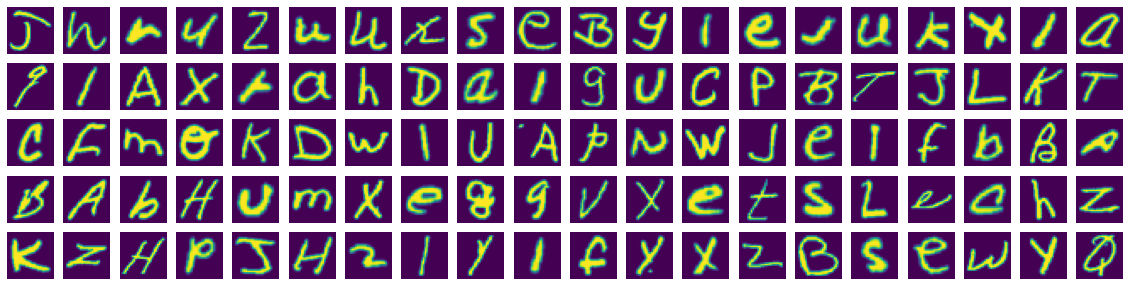

(124800, 28, 28, 1)
26


2022-01-22 23:45:27.476255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-22 23:45:27.486933: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-22 23:45:27.489358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x-dell): /proc/driver/nvidia/version does not exist
2022-01-22 23:45:27.521730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 512)               5308928   
                                                        

2022-01-22 23:45:27.856500: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21233664 exceeds 10% of free system memory.
2022-01-22 23:45:27.872271: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21233664 exceeds 10% of free system memory.
2022-01-22 23:45:27.882129: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21233664 exceeds 10% of free system memory.


In [6]:
images, labels = extract_training_samples('letters')
images.astype('float32') 
show_dataset(images)

images = images/255.
img_rows, img_cols = images.shape[1:3]
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
print(images.shape)

num_classes = np.size(np.unique(labels)) 
print(num_classes)
labels = utils.to_categorical(labels-1, num_classes) 


x_train, x_rem, y_train, y_rem = train_test_split(images,labels, train_size=0.8)
test_size = 0.5
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.8)



model1 = models.Sequential()
model1.add(Input(shape=(images.shape[1],images.shape[2],1)  ))
model1.add(layers.Conv2D(32, (3, 3), activation='relu',))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))


print(model1.summary())


model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

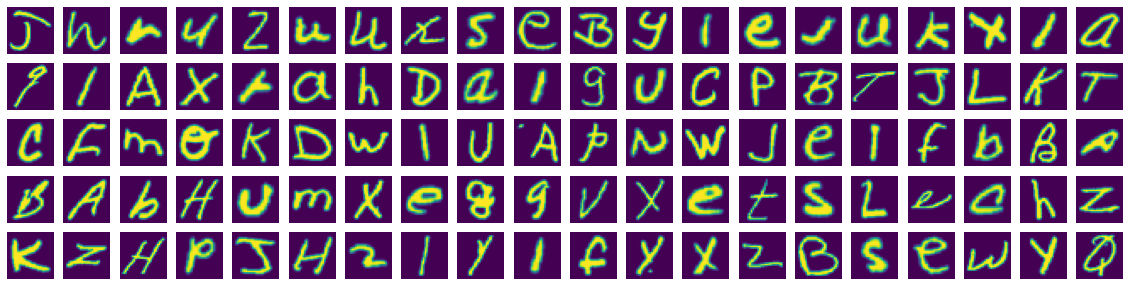

(124800, 28, 28, 1)
26
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5308928   
_________________________________________________________________
dense_1 (Dense)              (Non

In [6]:
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=EPOCHS)

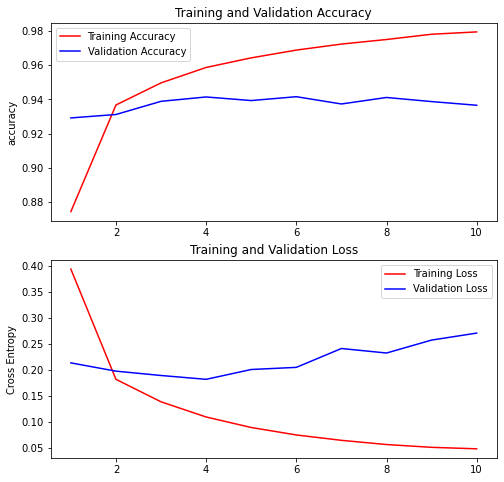

In [7]:
print_history_chart(history1)

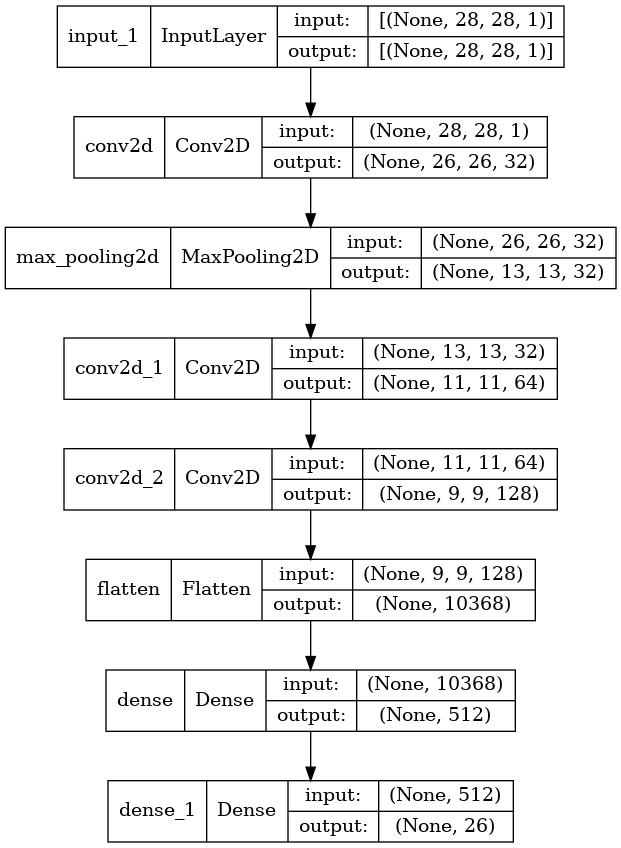

In [8]:
plot_model(model1, to_file='emnist_base.png', show_shapes=True, show_layer_names=True)


# VGG19 transfer learning

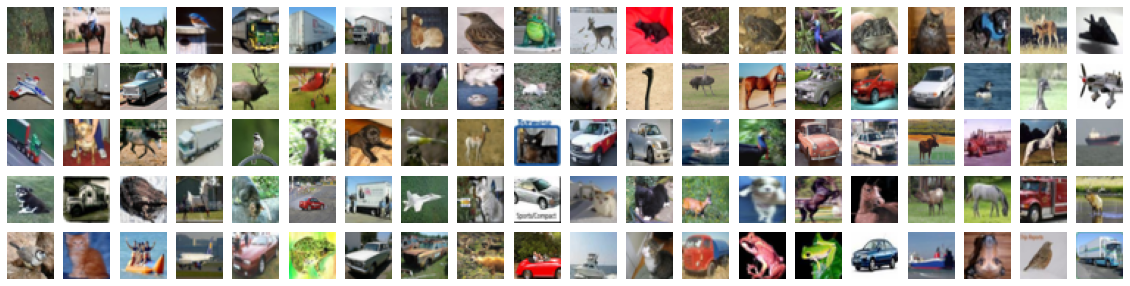

In [8]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)


num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
# rozpoznawanie cyferek VGG19 transfer learning
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
conv_base.trainable = False

print(conv_base.summary())



Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=128, epochs=EPOCHS,validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 287s 733ms/step - loss: 1.6039 - accuracy: 0.4313 - val_loss: 1.3615 - val_accuracy: 0.5195
Epoch 2/10
391/391 [==============================] - 286s 731ms/step - loss: 1.3809 - accuracy: 0.5136 - val_loss: 1.3058 - val_accuracy: 0.5395
Epoch 3/10
391/391 [==============================] - 283s 724ms/step - loss: 1.3173 - accuracy: 0.5390 - val_loss: 1.2441 - val_accuracy: 0.5628
Epoch 4/10
391/391 [==============================] - 294s 751ms/step - loss: 1.2822 - accuracy: 0.5508 - val_loss: 1.2224 - val_accuracy: 0.5717
Epoch 5/10
391/391 [==============================] - 366s 937ms/step - loss: 1.2482 - accuracy: 0.5620 - val_loss: 1.2016 - val_accuracy: 0.5786
Epoch 6/10
391/391 [==============================] - 335s 856ms/step - loss: 1.2269 - accuracy: 0.5718 - val_loss: 1.1861 - val_accuracy: 0.5821
Epoch 7/10
391/391 [==============================] - 339s 866ms/step - loss: 1.2088 - accuracy: 0.5780 - val_loss: 1.1707 -

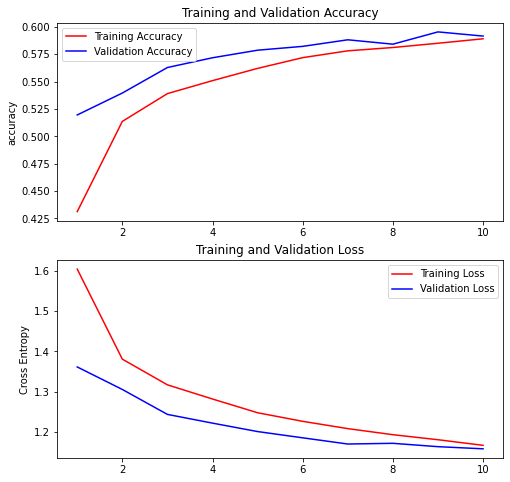

In [13]:
# model3.evaluate(x_test, y_test, verbose=0)

print_history_chart(history3)